# Chapter 2. Supervised Learning methods.
# Part 2. Linear models.

## - Some datasets

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mglearn

## Forge dataset (artificial)

In [29]:
#taking datasets
X, y = mglearn.datasets.make_forge()
X.shape

/home/akado/.local/lib/python3.8/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


(26, 2)

Text(0, 0.5, 'Second feature')

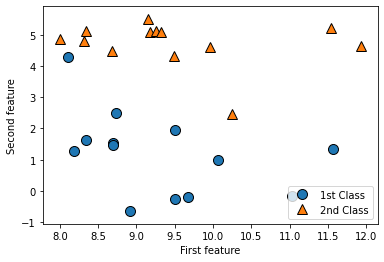

In [30]:
#building plot
#%matplotlib inline #allows to add plots to the browser inteface
mglearn.discrete_scatter(X[:, 0], X[:, 1], y) #plot building

plt.legend(["1st Class", "2nd Class"], loc=4) #legend
plt.xlabel("First feature")
plt.ylabel("Second feature")

## Wave dataset (artificial)

In [31]:
#taking datasets
X, y = mglearn.datasets.make_wave(n_samples =40)
X.shape

(40, 1)

Text(0, 0.5, 'Target value')

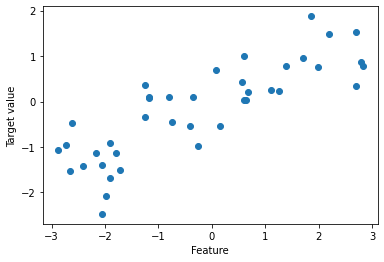

In [32]:
#building plot
plt.plot(X, y, 'o')

plt.xlabel("Feature")
plt.ylabel("Target value")

## Cancer dataset (natural)

In [33]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

In [34]:
print(cancer.keys())
print(cancer.data.shape)
print(cancer.feature_names)

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])
(569, 30)
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [35]:
#building a hash table to examine dataset
{n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))}

{'malignant': 212, 'benign': 357}

## Boston Housing dataset (natural)

In [36]:
from sklearn.datasets import load_boston
boston = load_boston()

In [37]:
print(boston.keys())
print(boston.data.shape)

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])
(506, 13)


## Boston Housing extended dataset (natural)

In [38]:
X, y = mglearn.datasets.load_extended_boston()

#104 features are previous 13 default features...
#...plus 91 derivative features
X.shape

(506, 104)

## - Linear Regression. Elementary example

w[0]: 0.393906  b: -0.031804


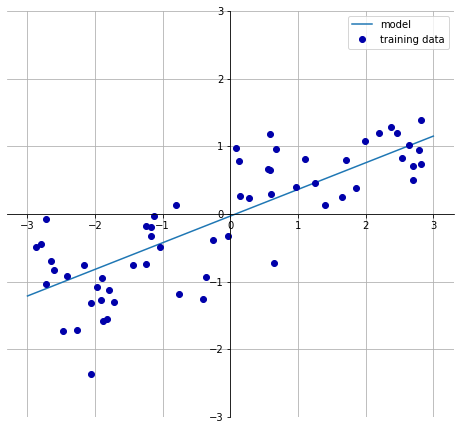

In [39]:
#calculating w and b for y=wx+b  where...
#...x and y are features and targets of dataset respectively
mglearn.plots.plot_linear_regression_wave()

## - Linear Regression
Easy to build but hard to control accuracy.

Principle lays on mean squared error minization just like gradient descend

In [40]:
#-----model initialization
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
#loading dataset and splitting data to train and test sets
X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

#model initialization and building
lr = LinearRegression().fit(X_train, y_train)
#show w (coefficients) and b (intercept/offset) of gain model
print("lr.coef_: {}".format(lr.coef_))
print("lr.intercept_: {}".format(lr.intercept_))

#-----model validation
print("train accuracy: {}".format(lr.score(X_train, y_train)))
print("test accuracy: {}".format(lr.score(X_test, y_test)))

lr.coef_: [0.39390555]
lr.intercept_: -0.03180434302675973
train accuracy: 0.6700890315075756
test accuracy: 0.6593368596863701


^ low accuracy for both of train and test sets tells that model is underfitted.

In [41]:
X, y = mglearn.datasets.load_extended_boston()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
#model initialization and building
lr = LinearRegression().fit(X_train, y_train)

#-----model validation
print("train accuracy: {}".format(lr.score(X_train, y_train)))
print("test accuracy: {}".format(lr.score(X_test, y_test)))

train accuracy: 0.9520519609032729
test accuracy: 0.6074721959665903


^ high accuracy for train set but low accuracy for test set tells that model is overfitted.

## - Ridge Regression (L2 Regularization)
The same method as Linear Regression but with feature regularization (values minimization keeping the effectiveness - L2 regularization)

Regularization is meant to prevent model from overfitting by its simplifying.

In [42]:
from sklearn.linear_model import Ridge

#-----model implementation
#model initialization and building
ridge = Ridge().fit(X_train, y_train)

#-----model validation
print("train accuracy: {}".format(ridge.score(X_train, y_train)))
print("test accuracy: {}".format(ridge.score(X_test, y_test)))

train accuracy: 0.8857966585170943
test accuracy: 0.7527683481744755


^ train accuracy of ridge regression decreased but test accuracy increased. Ridge regression has a better generalization ability.

To control the regularization impact there is an 'alpha' param. The higher is 'alpha', the higher the minimalization effect (the more simple a model is). The goal is to find a compromise between model simplisity and train accuracy.

In [43]:
#-----model implementation
#model initialization and building (using 'alpha' param)
ridge10 = Ridge(alpha=10).fit(X_train, y_train)

#-----model validation
print("train accuracy: {}".format(ridge10.score(X_train, y_train)))
print("test accuracy: {}".format(ridge10.score(X_test, y_test)))

train accuracy: 0.7882787115369614
test accuracy: 0.6359411489177309


Adjusting alpha param to get better results:

In [44]:
#-----model implementation
#model initialization and building (using 'alpha' param)
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print("train accuracy: {}".format(ridge10.score(X_train, y_train)))
print("test accuracy: {}".format(ridge10.score(X_test, y_test)))

train accuracy: 0.7882787115369614
test accuracy: 0.6359411489177309


As expected, high alpha value inhibits the W (feature value) aka 'coef_':

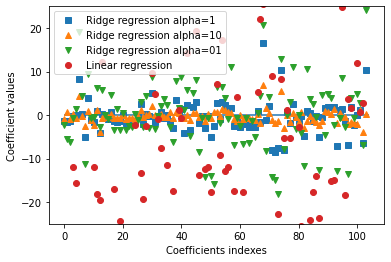

In [45]:
plt.plot(ridge.coef_,'s',label='Ridge regression alpha=1')
plt.plot(ridge10.coef_,'^',label='Ridge regression alpha=10')
plt.plot(ridge01.coef_,'v',label='Ridge regression alpha=01')
plt.plot(lr.coef_,'o',label='Linear regression')

plt.xlabel('Coefficients indexes')
plt.ylabel('Coefficient values')
#limit the y axis
plt.ylim(-25,25)
#render the y=0 line
plt.hlines(0,0,len(lr.coef_))

plt.legend()

## - Lasso Regression (L1 Regularization)
The same as L2 Regularization in Ridge Regression but the difference is that some values become exactly zero (irrelevant features ignorance)

In [46]:
from sklearn.linear_model import Lasso
#-----model implementation
#model initialization and building
lasso = Lasso().fit(X_train, y_train)

#-----model validation
print('train accuracy: {}'.format(lasso.score(X_train, y_train)))
print('test accuracy: {}'.format(lasso.score(X_test, y_test)))

print('Used features count: {}'.format(np.sum(lasso.coef_!=0)))

train accuracy: 0.29323768991114596
test accuracy: 0.20937503255272272
Used features count: 4


^ model underfitting forces to increase the 'alpha' param. And also increase the 'max_iter' param (sets the max iterations count)

In [47]:
#-----model implemetaion
#model initialization and building
#increasing 'alpha' and 'max_iter' params
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)

#-----model validation
print('train accuracy: {}'.format(lasso001.score(X_train, y_train)))
print('test accuracy: {}'.format(lasso001.score(X_test, y_test)))

print('Used features count: {}'.format(np.sum(lasso001.coef_!=0)))

train accuracy: 0.89622265110865
test accuracy: 0.7656571174549978
Used features count: 33


^ good results

In [48]:
#-----model implemetaion
#model initialization and building
#increasing 'alpha' and 'max_iter' params
lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)

#-----model validation
print('train accuracy: {}'.format(lasso00001.score(X_train, y_train)))
print('test accuracy: {}'.format(lasso00001.score(X_test, y_test)))

print('Used features count: {}'.format(np.sum(lasso00001.coef_!=0)))

train accuracy: 0.9507158754515463
test accuracy: 0.6437467421273717
Used features count: 96


^ overfitting as the result of overadjusting 'alpha' param

Text(0, 0.5, 'Coefficients value')

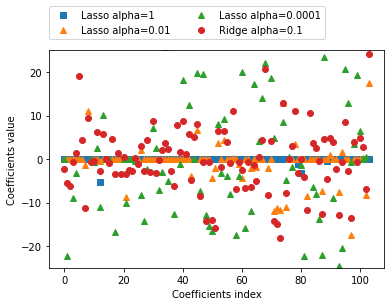

In [49]:
plt.plot(lasso.coef_, 's', label='Lasso alpha=1')
plt.plot(lasso001.coef_, '^', label='Lasso alpha=0.01')
plt.plot(lasso00001.coef_, '^', label='Lasso alpha=0.0001')
plt.plot(ridge01.coef_, 'o', label='Ridge alpha=0.1')

plt.legend(ncol=2, loc=(0,1.05))
plt.ylim(-25,25)
plt.xlabel('Coefficients index')
plt.ylabel('Coefficients value')

Choosing between Ridge and Lasso it's better to pick Lasso in case of huge count of features where you're sure that only few of them are important. Also Lasso would give a well-interpreted model because of less count of used features.

There's 'ElasticNet' model class in scikit-learn that combines L1 and L2 regularizations that provides high quality for generalization ability.

# - Binary Linear Classification

## Logistic Regression and SVC (Support Vector Classifier)

/home/akado/.local/lib/python3.8/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)
/home/akado/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


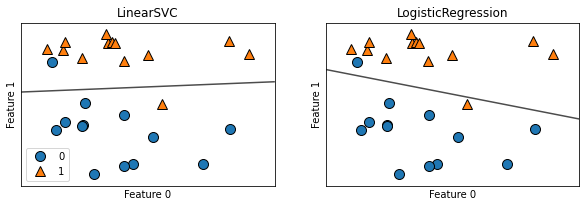

In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
#loading dataset
X, y = mglearn.datasets.make_forge()

#preparing plots
fig, axes = plt.subplots(1,2,figsize=(10,3))

for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
    #-----model implementation
    #model initialization and building
    clf = model.fit(X,y)
    
    #plots building
    #decision boundary line rendering
    mglearn.plots.plot_2d_separator(clf,X,fill=False,eps=0.5,ax=ax,alpha=0.7)
    
    mglearn.discrete_scatter(X[:,0],X[:,1],y,ax=ax)
    ax.set_title('{}'.format(clf.__class__.__name__))
    ax.set_xlabel('Feature 0')
    ax.set_ylabel('Feature 1')
axes[0].legend()

## 'C' compromise param for Logistic Regression

#### L2 Regularization
SVC and Logistick Regressor use L2 regularization by default.
'C' param decreases regularization effect

Accuracy without defined 'C' (default C=1.0):

In [55]:
from sklearn.datasets import load_breast_cancer
#load dataset
cancer = load_breast_cancer()
#splitting dataset
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)

#-----model implementation
#model initialization and building
logreg = LogisticRegression().fit(X_train, y_train)

#-----model validation
print('Train accuracy: {}'.format(logreg.score(X_train, y_train)))
print('Test accuracy: {}'.format(logreg.score(X_test, y_test)))

Train accuracy: 0.9460093896713615
Test accuracy: 0.958041958041958


/home/akado/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Gain accuracy is nice but train-test similarity probably tells that there's an underfitting.
If so, it could be solved by increasing 'c' param (C=100)

In [57]:
#-----model implementation
#model initialization and building
logreg100 = LogisticRegression(C=100).fit(X_train, y_train)
#-----model validation
print('Train accuracy: {}'.format(logreg100.score(X_train, y_train)))
print('Test accuracy: {}'.format(logreg100.score(X_test, y_test)))

Train accuracy: 0.9436619718309859
Test accuracy: 0.965034965034965


/home/akado/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


^ accuracy increased. There definitely was an underfitting and 'c' param just fixed it.

Getting accuracy on more regularized model by decreasing 'c' param (C=0.01)

In [58]:
#-----model implementation
#model initialization and building
logreg001 = LogisticRegression(C=0.01).fit(X_train, y_train)
#-----model validation
print('Train accuracy: {}'.format(logreg001.score(X_train, y_train)))
print('Test accuracy: {}'.format(logreg001.score(X_test, y_test)))

Train accuracy: 0.9342723004694836
Test accuracy: 0.9300699300699301


/home/akado/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


^ accuracy decreased. Model is underfitted

Comparing accuracies with different 'C' param:

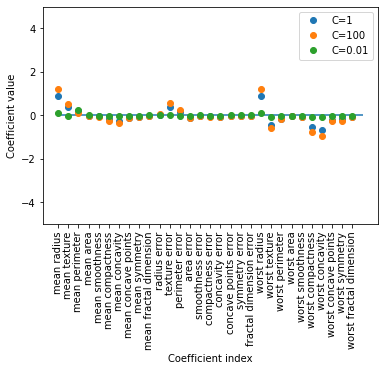

In [76]:
plt.plot(logreg.coef_.T,'o',label='C=1')
plt.plot(logreg100.coef_.T,'o',label='C=100')
plt.plot(logreg001.coef_.T,'o',label='C=0.01')
plt.ylim(-5,5)
#rendering line (y cord, x cord, data)
plt.hlines(0,0,cancer.data.shape[1])
#rendering feature names
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)

plt.xlabel('Coefficient index')
plt.ylabel('Coefficient value')
plt.legend()

#### L1 Regularization
The same 'C' params but applying on L1 Regularization

Train accuracy L1(0.001): 0.9131455399061033
Test accuracy L1(0.001): 0.9230769230769231


/home/akado/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Train accuracy L1(1): 0.960093896713615
Test accuracy L1(1): 0.958041958041958
Train accuracy L1(100): 0.9859154929577465
Test accuracy L1(100): 0.9790209790209791


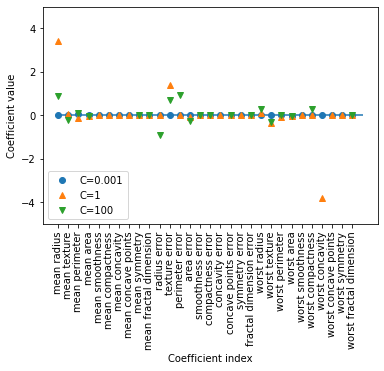

In [104]:
for C, marker in zip([0.001,1,100],['o','^','v']):
    #-----model implementation
    #model initialization and building
    lr_l1 = LogisticRegression(C=C, penalty='l1', solver='liblinear').fit(X_train, y_train)
    #-----model validation
    print('Train accuracy L1({}): {}'.format(C, lr_l1.score(X_train, y_train)))
    print('Test accuracy L1({}): {}'.format(C, lr_l1.score(X_test, y_test)))
    plt.plot(lr_l1.coef_.T, marker, label='C={}'.format(C))
    
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.hlines(0,0, cancer.data.shape[1])
plt.xlabel('Coefficient index')
plt.ylabel('Coefficient value')

plt.ylim(-5,5)
plt.legend(loc=3)